# Utilisation de LeNet5 pour la classification des radiographies pulmonaires

## Réalisé par : Ahmed Mrabet

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Dataset

In [3]:
img_height = 64
img_width = 64
batch_size = 20

train_dataset =  tf.keras.utils.image_dataset_from_directory("chest_xray_dataset/train/", image_size=(img_height, img_width), batch_size=batch_size)
test_dataset =  tf.keras.utils.image_dataset_from_directory("chest_xray_dataset/test/", image_size=(img_height, img_width), batch_size=batch_size)
validation_dataset =  tf.keras.utils.image_dataset_from_directory("chest_xray_dataset/validation/", image_size=(img_height, img_width), batch_size=batch_size)

Found 4142 files belonging to 3 classes.
Found 1375 files belonging to 3 classes.
Found 1385 files belonging to 3 classes.


# Visualisation des données

['covid', 'normal', 'pneumonia']


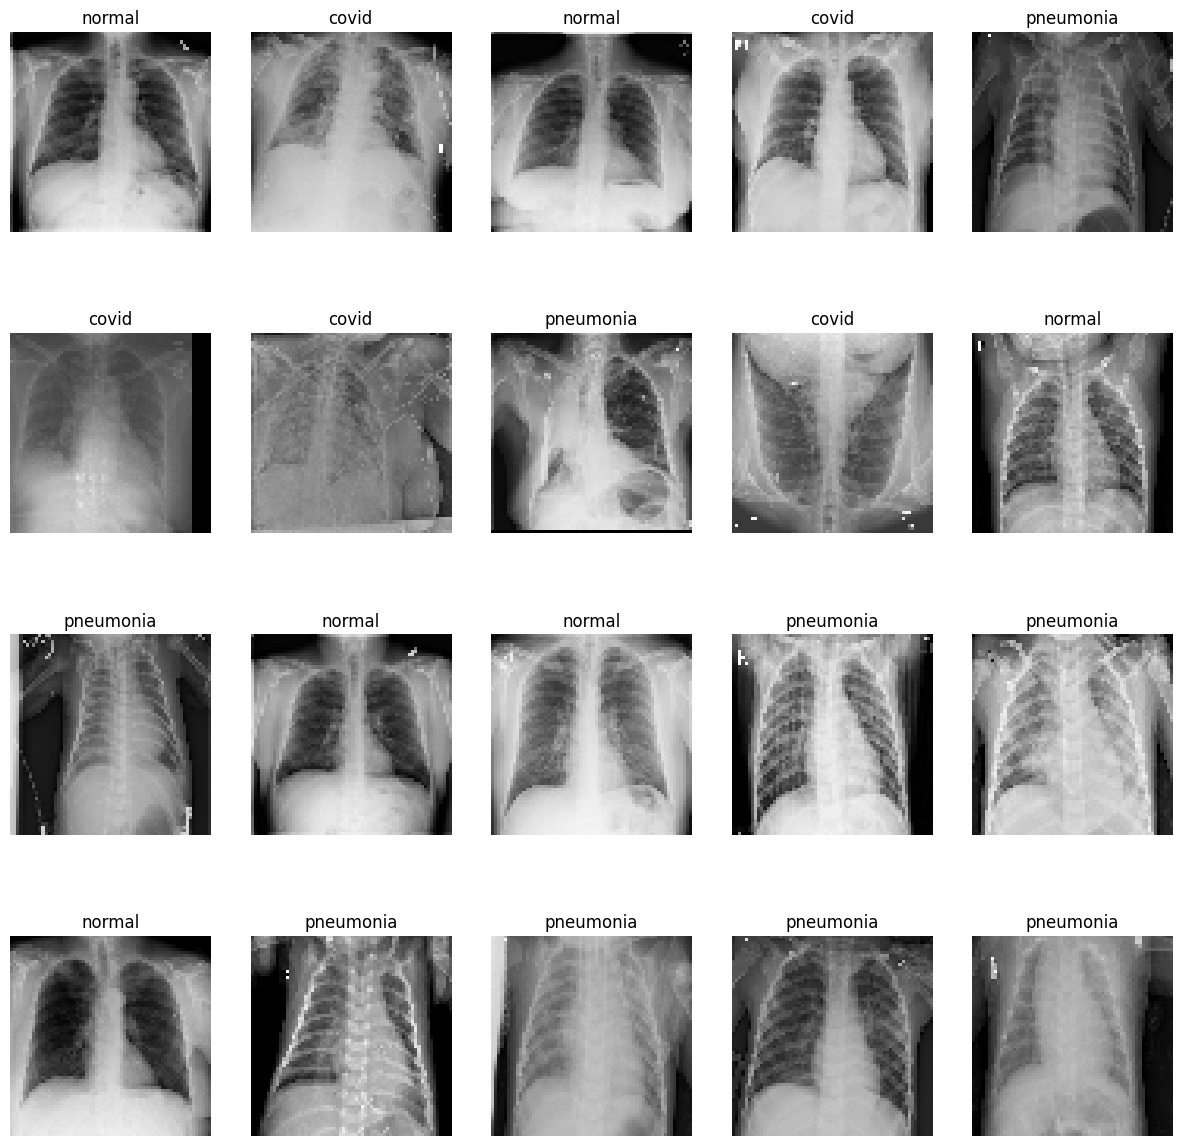

In [ ]:
class_names = train_dataset.class_names
plt.figure(figsize=(15, 15))
for images, labels in train_dataset.take(1):
    for i in range(20):
        ax = plt.subplot(4, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

# Step 2: Création du modèle

In [4]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Rescaling, Conv2D, AveragePooling2D, Flatten, Dense, Dropout

model = Sequential([
    Rescaling(1./255),
     # C1: Convolutional Layer
    Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(img_height, img_width, 1), padding='valid'),
    
    # S2: Subsampling (Average Pooling) Layer
    AveragePooling2D(pool_size=(2, 2), strides=2),
    
    # C3: Convolutional Layer
    Conv2D(16, kernel_size=(5, 5), activation='relu'),
    
    # S4: Subsampling (Average Pooling) Layer
    AveragePooling2D(pool_size=(2, 2), strides=2),
    
    # C5: Fully Connected Convolutional Layer
    Conv2D(120, kernel_size=(5, 5), activation='relu'),
    
    # Flatten the output
    Flatten(),
    
    # F6: Fully Connected Layer
    Dense(84, activation='relu'),
    
    # Output Layer (Gaussian Connection)
    Dense(3, activation='softmax')  # 10 classes for classification
])

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Step 3: Paramétrage du modèle

In [5]:
model.compile(
  optimizer='adam', 
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), 
  metrics=['accuracy']
)

# Step 4: Training du modèle

In [6]:
model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10
)

Epoch 1/10


C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


208/208 ━━━━━━━━━━━━━━━━━━━━ 29s 117ms/step - accuracy: 0.5838 - loss: 0.8554 - val_accuracy: 0.7769 - val_loss: 0.5699
Epoch 2/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 22s 106ms/step - accuracy: 0.8066 - loss: 0.5162 - val_accuracy: 0.8274 - val_loss: 0.4828
Epoch 3/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 22s 103ms/step - accuracy: 0.8314 - loss: 0.4439 - val_accuracy: 0.8513 - val_loss: 0.4041
Epoch 4/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 22s 107ms/step - accuracy: 0.8633 - loss: 0.3752 - val_accuracy: 0.8347 - val_loss: 0.4349
Epoch 5/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 23s 111ms/step - accuracy: 0.8663 - loss: 0.3463 - val_accuracy: 0.8585 - val_loss: 0.4067
Epoch 6/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 25s 118ms/step - accuracy: 0.8996 - loss: 0.2878 - val_accuracy: 0.8939 - val_loss: 0.3203
Epoch 7/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step - accuracy: 0.9048 - loss: 0.2637 - val_accuracy: 0.9119 - val_loss: 0.2944
Epoch 8/10
208/208 ━━━━━━━━━━━━━━━━━━━━ 22s 107ms/step - accuracy: 0.9157 - loss: 0.2287 - val

# Step 5: Test

In [7]:
model.evaluate(test_dataset, verbose=2)

69/69 - 5s - 78ms/step - accuracy: 0.9287 - loss: 0.2288


[0.22880147397518158, 0.9287272691726685]